In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
LOCAL_FAST_AI = '/Users/krishnakalyan3/Educational/FastAI/fastai/'
AWS_FAST_AI = '/home/ubuntu/fastai'
sys.path.append(AWS_FAST_AI)
from fastai.transforms import * 
from fastai.conv_learner import * 
from fastai.model import *
from fastai.dataset import * 
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = '/home/ubuntu/Plant/data/'

In [7]:
def get_data(size, bs=64):
    # transforms_top_down
    aug_tfms=transforms_side_on
    tfms = tfms_from_model(arch, sz=size, aug_tfms=aug_tfms)
    data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs)
    return data

In [8]:
sz = 64
bs=64
arch = resnext101
data = get_data(sz)

In [9]:
learn = ConvLearner.pretrained(arch, data) 

In [6]:
learn.precompute=False
learn.fit(0.2, 8, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=9), HTML(value='')))

[ 0.       2.27147  1.22569  0.61389]                     
[ 1.       1.69691  1.15224  0.60243]                     
[ 2.       1.44834  1.06047  0.6316 ]                     
[ 3.       1.32878  1.0134   0.65278]                     
[ 4.       1.26373  0.96905  0.67361]                     
[ 5.       1.20788  0.9562   0.67639]                     
[ 6.       1.16904  0.94206  0.66389]                     
[ 7.       1.13535  0.8811   0.70104]                     
[ 8.       1.11944  0.9149   0.67257]                     



In [7]:
learn.unfreeze()
lr=np.array([1e-4,1e-3,1e-2])
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=21), HTML(value='')))

[ 0.       1.27259  0.85008  0.73021]                     
[ 1.       0.83795  0.51304  0.81875]                      
[ 2.       0.56587  0.41441  0.85347]                      
[ 3.       0.41262  0.37689  0.85729]                      
[ 4.       0.34129  0.38775  0.86354]                      
[ 5.       0.31102  0.38159  0.86806]                      
[ 6.       0.2625   0.35992  0.87951]                      
[ 7.       0.20286  0.3304   0.88264]                      
[ 8.       0.1735   0.32003  0.89479]                      
[ 9.       0.13837  0.32737  0.88681]                      
[ 10.        0.1137    0.31932   0.88472]                  
[ 11.        0.09776   0.34246   0.89236]                   
[ 12.        0.08255   0.35115   0.88785]                   
[ 15.        0.05864   0.3525    0.89861]                   
[ 16.        0.0537    0.34171   0.89722]                   
[ 17.        0.05184   0.33346   0.89965]                   
[ 18.        0.04997   0.33881   0.9

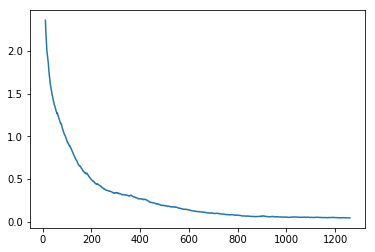

In [11]:
learn.sched.plot_loss()

In [12]:
learn.save(f'resnext_101_{sz}')

In [17]:
sz = 128
lr = 0.2

In [19]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.36644  0.35523  0.87813]                      
[ 1.       0.41992  0.47506  0.85278]                      
[ 2.       0.35299  0.37981  0.87847]                      
[ 3.       0.37411  0.42014  0.87396]                      
[ 4.       0.38577  0.44307  0.87292]                      
[ 5.       0.3554   0.33788  0.87813]                      
[ 6.       0.278    0.33314  0.8875 ]                      



In [20]:
lrs = np.array([lr/9,lr/3,lr])
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       1.98114  1.50446  0.48056]                     
[ 1.       1.50257  1.07351  0.64618]                     
[ 2.       0.99714  0.79309  0.71875]                      
[ 3.       0.97015  1.33995  0.53715]                      
[ 4.       0.74914  0.65641  0.79375]                      
[ 5.       0.53544  0.43685  0.85313]                      
[ 6.       0.37848  0.40024  0.85417]                      



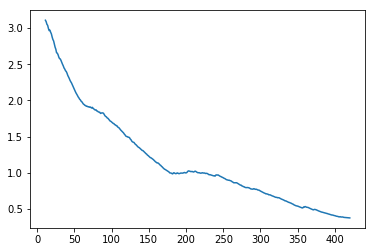

In [21]:
learn.save(f'resnext_101_{sz}')
learn.sched.plot_loss()

In [10]:
learn.load('resnext_101_128')

In [11]:
sz = 256
lr = 0.2

In [12]:
learn.set_data(get_data(sz, 32))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.74164  0.58177  0.81354]                        
[ 1.       0.86965  0.63591  0.82083]                        
[ 2.       0.59713  0.58216  0.82188]                        
[ 3.       1.47627  2.03349  0.70417]                       
[ 4.       1.30458  0.94456  0.79896]                       
[ 5.       0.67735  0.54095  0.84583]                        
[ 6.       0.45592  0.48939  0.84688]                        



In [14]:
lrs = np.array([lr/8,lr/2,lr])
learn.unfreeze()
#learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

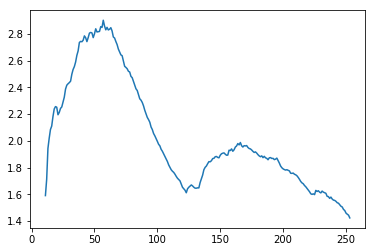

In [15]:
learn.save(f'resnext_101_{sz}')
learn.sched.plot_loss()

In [ ]:
# 64
# 128
# 224
# 300

## Confusion Matrix

In [21]:
log_preds_train, y_train = learn.TTA(is_test=False)

In [29]:
probs = np.exp(log_preds_train)
preds = np.mean(probs, axis=0)
preds = np.argmax(preds, axis=1)

(5, 944, 12)

In [49]:
a,b,c = metrics(y_train, preds)

In [50]:
a,b

(0.78465036495400919, 0.80296610169491522)

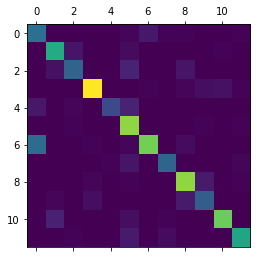

In [51]:
def metrics(y, yhat):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    from sklearn.metrics import accuracy_score
    cm = confusion_matrix(y, yhat)
    f1 = f1_score(y, yhat, average='macro')
    acc = accuracy_score(y, yhat)
    
    #plt.matshow(cm)
    return f1, acc, cm

In [93]:
len(y_test)

944

In [86]:
probs = np.exp(log_preds_test)
preds = np.mean(probs, axis=0)
preds = np.argmax(preds, axis=1)

In [102]:
#log_preds_test, y_test = learn.predict(is_test=True)

In [103]:
a,b,c = metrics(y_test, preds)

In [104]:
a,b

(0.78282884895738425, 0.80614406779661019)

In [106]:
columns = pd.read_csv(PATH + 'sample_submission.csv').columns
test = pd.DataFrame(preds)
#test.index = os.listdir(PATH+'test')
#test.columns = columns

In [ ]:
submission = pd.DataFrame({'file': os.listdir()})